In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sidetable
from matplotlib import pyplot as plt

# Read in and Explore Dataset

In [84]:
df = pd.read_csv("/Users/stephenkullman/Desktop/Python/Hands on Machine Learning/Linear Regression/diamonds.csv")

In [85]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [86]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Renaming labels to better names

In [87]:
df = df.rename({'depth':'depth_percentage','x':'length','y':'width','z':'depth'},axis=1)

In [88]:
df.head()

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
df = df.drop(['depth_percentage','length','width','depth'],axis=1)

In [90]:
df.head()

,carat,cut,color,clarity,table,price
0,0.23,Ideal,E,SI2,55.0,326
1,0.21,Premium,E,SI1,61.0,326
2,0.23,Good,E,VS1,65.0,327
3,0.29,Premium,I,VS2,58.0,334
4,0.31,Good,J,SI2,58.0,335


How many of each cut do we have?

In [91]:
df.stb.freq(['cut'])

,cut,count,percent,cumulative_count,cumulative_percent
0,Ideal,21551,39.953652,21551,39.953652
1,Premium,13791,25.567297,35342,65.520949
2,Very Good,12082,22.398962,47424,87.919911
3,Good,4906,9.095291,52330,97.015202
4,Fair,1610,2.984798,53940,100.000000


Summary Group Statistics

In [92]:
df.cut = df.cut.astype('category')
df.cut = df.cut.cat.reorder_categories(['Fair','Good','Very Good','Premium','Ideal'])
df.groupby('cut').agg({'price':'mean'}).round(2)

,price
cut,
Fair,4358.76
Good,3928.86
Very Good,3981.76
Premium,4584.26
Ideal,3457.54


<Axes: >

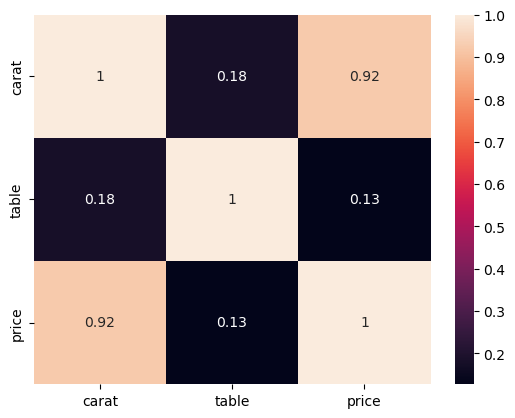

In [93]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Let's look at carat vs price in a scatterplot

Text(0.5, 1.0, 'Scatterplot of Carat against Price of Diamonds')

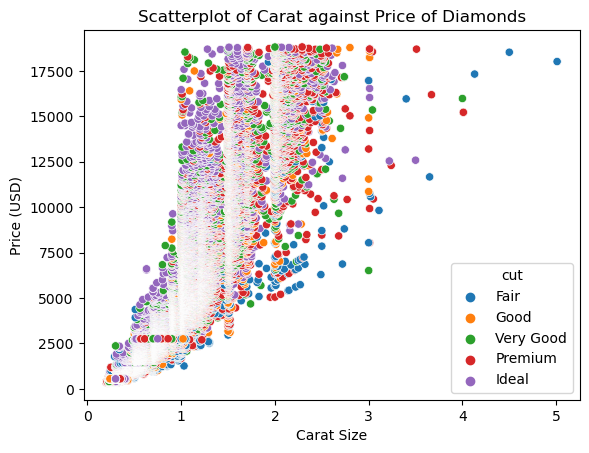

In [94]:
sns.scatterplot(x = 'carat',y = 'price',data=df, hue = 'cut')
plt.xlabel('Carat Size')
plt.ylabel('Price (USD)')
plt.title("Scatterplot of Carat against Price of Diamonds")

A little busy, let's create a facet grid

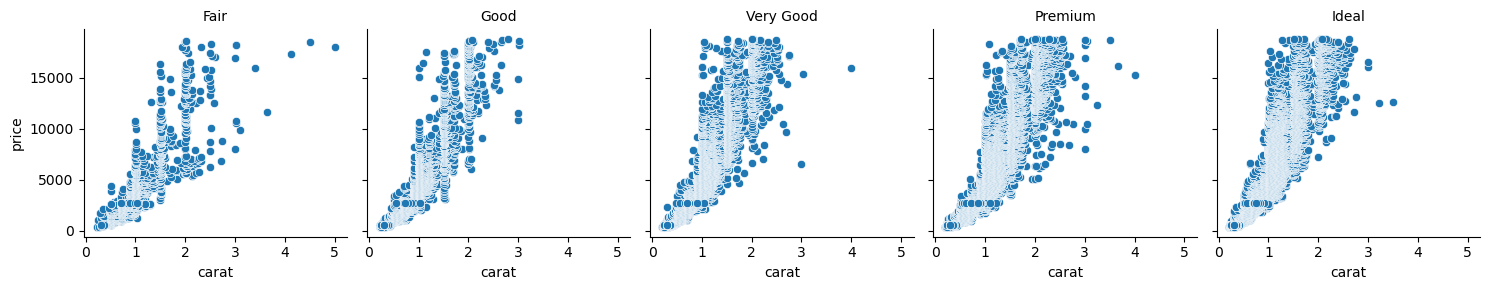

In [95]:
g = sns.FacetGrid(df,col='cut',height=3,aspect=1)
g.map(sns.scatterplot,'carat','price')
g.set_titles('{col_name}')

# Linear Regression

In [96]:
from sklearn.model_selection import train_test_split # import splitting function
df_train, df_test = train_test_split(df,test_size=.4) # Split our train and test data 60/40

'''Here we assign the x and y training and test datasets'''
x_train = df_train[['carat']]
x_test = df_test[['carat']]

y_train = df_train[['price']]
y_test = df_test[['price']]

We should find something to compare the regression to. A good example would be comparing it to the mean of the target variable.

In [97]:
mean_price = df.price.mean().round(2)
mean_price

3932.8

In [98]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean') #Create Regressor object
baselin.fit(x_train,y_train) # Train the Regressor

y_test_baselin = baselin.predict(x_test) # Predict

In [99]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_test_pred = reg.predict(x_test)

Evaluating Model Accuracy

In [100]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [101]:
print('R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(r2_score(y_test,y_test_pred),
                                                          r2_score(y_test,y_test_baselin)))

R2 Regressor = 0.85 vs Baseline = -0.00


.85 is pretty good, but I remain skeptical without checking the underlying regression assumptions like the distribution of the errors, outlier analysis, etc.

<Axes: ylabel='Count'>

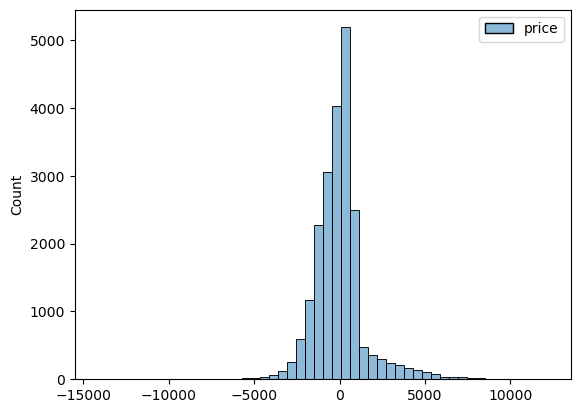

In [102]:
sns.histplot((y_test-y_test_pred),bins=50)

In [103]:
coeff_df = pd.DataFrame(reg.coef_,x_train.columns,columns = ['carat'])
coeff_df

,carat
carat,7772.853427
